# Customer Churn Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [9]:
data = pd.read_csv('bigml_59c28831336c6604c800002a.csv')

data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


# Data Understanding

The SyriaTel dataset contains 3333 rows and 21 columns. The columns are brokendown into these categories:

1. Customer Demographics:

- state: This categorical variable might represent the customer's state of residence. While potentially useful for understanding geographic trends, its use 
might be limited due to privacy concerns.

- area code: Similar to state, this categorical variable identifies the customer's area code.

- phone number: This unique identifier is likely anonymized for privacy reasons and not directly used in analysis.

2. Plan and Service Usage:

- international plan: This binary variable indicates whether the customer has an international calling plan (1) or not (0).

- voice mail plan: This binary variable indicates whether the customer has a voicemail plan (1) or not (0).

- number vmail messages: This numerical variable represents the total number of voicemail messages received by the customer.

3. Call Activity:

- total day minutes, total day calls, total day charge: These numerical variables capture the total minutes spent, number of calls made, and total charges incurred during daytime hours.

- total eve minutes, total eve calls, total eve charge: Similar to the above, these features represent usage and charges for evening calls.

- total night minutes, total night calls, total night charge: These capture usage and charges for calls made at night.

- total intl minutes, total intl calls, total intl charge: These features represent the total minutes, number of calls, and charges associated with international calls.

4. Customer Service Interaction:

- customer service calls: This numerical variable indicates the total number of calls made by the customer to SyriaTel's customer service department.

5. Target Variable

- churn: This binary variable is the target variable of the dataset. It indicates whether the customer churned (1) or did not churn (0). This is the key variable used to predict customer churn.

## Overview of Dataset

- Check the following details about the dataset:

    1. Unique Values
   
    2. Statistical Description of Data
   
    3. Value count of target variables



In [14]:
# View the Unique Values
data.nunique()

state                       51
account length             212
area code                    3
phone number              3333
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [19]:
# Get statistical description of the data
data.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [26]:
#Get the value counts of the target variable
data['churn'].value_counts()

churn
False    2850
True      483
Name: count, dtype: int64

<Axes: xlabel='churn', ylabel='count'>

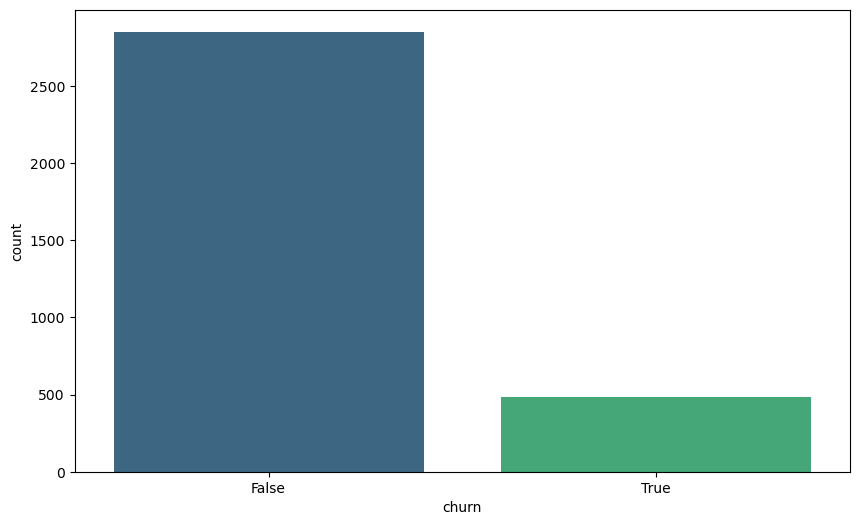

In [29]:
#Visualize the Value Counts
plt.figure(figsize=(10,6))

sns.countplot(x='churn',data=data,palette='viridis')

**Check for missing values**

In [23]:
# Create a function 

null_num = []

for i in data.columns:
    x = data[i].isnull().sum()
    null_num.append(x)
# Visualize the output
null = pd.DataFrame(null_num,index=data.columns,columns=['Total Missing Values'])
null

,Total Missing Values
state,0
account length,0
area code,0
phone number,0
international plan,0
voice mail plan,0
number vmail messages,0
total day minutes,0
total day calls,0
total day charge,0
